In [18]:
class Tweet:
    num = 0
    def __init__(self, user, text, date, *args):
        self.user = user
        self.text = text
        self.date = date
        self.data = args
        self.num = Tweet.num
        Tweet.num += 1
    def __repr__(self):
        return ' '.join([self.user,self.text,self.date.strftime("%d.%m.%Y"),str(self.num)])



In [19]:
import networkx as nx
import numpy as np
import datetime

MONTH_TAG="month"
YEAR_TAG="year"
DAY_TAG="day"
TWEET_TAG="tweet"

MONTH_NAMES = {1:"JAN",2:"FEB",3:"MAR",4:"APR",
          5:"MAY",6:"JUN",7:"JUL",8:"AUG",
         9:"SEP",10:"OCT",11:"NOV",12:"DEC"}

def sampleTweets():
    tweets = []
    t1 = Tweet("Helin","bugün hava çok güzel",datetime.datetime.strptime("01.01.2019",'%d.%m.%Y'))
    t2 = Tweet("Burcu","bugün hava güneşli",datetime.datetime.strptime("02.02.2018",'%d.%m.%Y'))
    tweets.append(t1)
    tweets.append(t2)
    return tweets 

In [20]:


def create_graph(tweets):
    G1 = None
    
    G1 = nx.Graph()

    for tweet in tweets:
        G1.add_node(tweet.user)
        tweetFormat = "tweet_{user}_{id}".format(user=tweet.user,id=tweet.num)
        G1.add_edge(tweet.user,tweetFormat,weight=1.0)
        #G1.add_edge(YEAR_TAG,tweet.date.year,weight=15.0)
        #G.add_edge(tweet.date.year,YEAR_TAG,weight=1.0)
        for word in tweet.text.split():
            G1.add_edge(word,tweetFormat,weight=1.0)
            #print(word)
        monthFormat = "{month}.{year}".format(month=tweet.date.month,year=tweet.date.year)
        
        G1.add_edge(tweet.date.year,monthFormat,weight=4.0)
        G.add_edge(monthFormat,tweet.date.year,weight=1.0)
        
        dayFormat = "{day}.{month}.{year}".format(day=tweet.date.day,month=tweet.date.month,year=tweet.date.year)
        G1.add_edge(monthFormat,dayFormat,weight=8.0)
        G1.add_edge(dayFormat,tweetFormat,weight=10.0)
    return G1

In [21]:
tweets = sampleTweets()
G = nx.Graph()
G = create_graph(tweets)

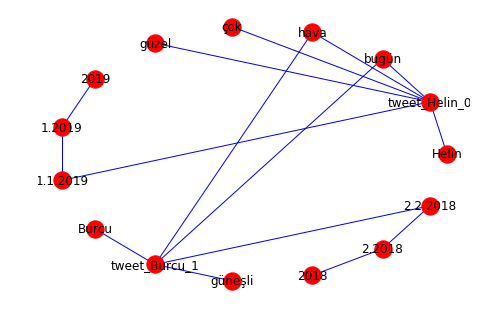

In [22]:
nx.draw(G,with_labels=True,pos=nx.circular_layout(G),nodecolor='r', edge_color='b')